# 1) Regresión Lineal Ordinaria

In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## (a) Importe y Visualización del Dataset
> Podemos imprimir los primeros valores del dataset con la función *Head( )*, antes y despues de aplicado el comando drop.

In [102]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [103]:
df.drop(['id','date','zipcode',], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


> La función *drop( )* elimina las columnas mencionadas como argumento, del dataset, este proceso es parte de la limpieza inicial de todo dataset, donde se debe preparar el mismo para su análisis.

## (b) Descripcion del Dataset

> La función *.shape( )* permite conocer las dimensiones del dataset, en este caso, luego de haber eliminado las variables no utilizadas para el análisis: <br>
- **Número de filas:** 21613 <br>
- **Número de columnas:** 18

In [104]:
df.shape

(21613, 18)

> La función *info()* entrega un resumen general de las columnas del dataset, la cantidad de filas de cada una y el tipo de dato que almacena. Para el dataset kc_house_data utilizado, la mayoría de las columnas están formateadas para almacenar registros de tipo entero de 64 bits de largo de registro y punto flotante del mismo largo. Adicionalmente la cantidad de memoria utilizada para almacenar el dataset es de 3.5MB aprox.<br>
<br>
Gran parte de las columnas del dataset corresponden a **variables numéricas discretas**, las cuales entregan información sobre propiedades consideradas de relevancia para poder determinar el precio en el mercado de una vivienda.

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


> La función *.describe( )* entrega estadísiticos de tendencia y dispersión de las variables del dataset, además se hace un redondeo a dos cifras decimales para mejor lectura de los valores. <br>


In [106]:
df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,47.56,-122.21,1986.55,12768.46
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,0.14,0.14,685.39,27304.18
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,47.16,-122.52,399.00,651.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,47.78,-121.32,6210.00,871200.00


> A partir de la tabla de resumen de estadísticos obtenida podemos empezar a notar algunas cosas interesantes:
- La media de la variable precio cae cerca de las 540000 unidades monetarias y el tercer cuartíl cerca de las 645000, sin embargo, el precio máximo es de 7700000 unidades monetarias. Un comportamiento similar se observa en las variables *bedrooms* (habitaciones), *bathrooms* (número de baños), *sqft_living* (pies cuadrados hábiles de la vivienda) y *sqft_lot* (pies cuadrados del terreno de construcción), este comportamiento sugiere la existencia de un grupo de ouliers, viviendas con un alto valor monetario respaldado por propiedades de las mismas considerablemente superiores a las de los tres primeros cuartiles del dataset.
- El 75% de las viviendas fueron construidas dentro de los años 1900 y 1997, siendo la mediana el año 1975, sobre esto, un 25% de las viviendas se construyeron entre los años 1997 y 2015 pudiendo explicar parte de la gran diferencia de precio entre un pequeño conjunto de viviendas.
- El 75% de las viviendas posee un puntaje de condición (variable *condition*) de 4.00, lo que sugiere que en general todas las viviendas medidas en el dataset se encontraban en buen estado.
- Es interesante notar que la media la variable *sqft_living* (pies cuadrados hábiles de la vivienda) es menor en comparación con el valor de la misma variable, para la medición realizada el año 2015, sin embargo, la cantiad de viviendas medidas es la misma (2163), o mismo sucede con la variable *sqft_lot* (pies cuadrados del terreno de construcción). Se sabe que el valor de las variables *sqft_living15* y *sqft_lot15* son los valores medidos el año 2015, en los cuales se incluye las remodelaciones realizadas a la vivienda. La disminución de los valores del par de variables sugiere que interesantemente, aunque la cantidad de viviendas no cambió, producto de las remodelaciones si disminuyó la superficie de terreno de construcción y de vivienda.

## (c) Normalización de Datos

> Escalar una variable permite ajustar su rango de valores a un rango acotado predefinido, este tipo de preprocesamiento se utiliza cuando el modelo que se tiene es sensible a magnitudes, en nuestro caso, la variable objetivo para la regresión es *price*, la cual presenta rangos de valores en magnitudes demasiado distintas en comparación a los atributos con los que alimentaremos el modelo, como el número de baños (rango 0-8), el número de habitaciones (rango 0-33), etc. Si no se escala la variable, se generará un modelo en el cual, al aumentar en un pequeño diferencial el atributo (*feature*), la variable objetivo de la predicción experimentará un aumento considerable.<br>
<br>
Es interesante notar que algunos algoritmos pueden mejorar considerablemente su rapidez de convergencia con datos normalizados (SVM, por ejemplo). En nuestro caso, **puesto que se realizará una regresión lineal de mínimos cuadrados, la normalización no tiene mayor efecto**, pues no varía la correlación de los coeficientes al ser términos lineales, no siendo el caso si usásemos un algoritmo basado en coeficientes no lineales. Podemos ver como la dispersión de los valores de la variable se reduce notablemente:


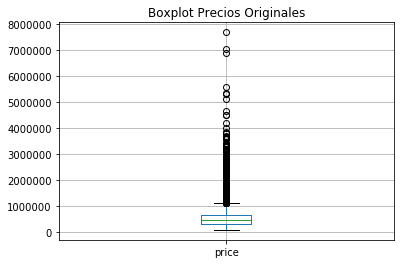

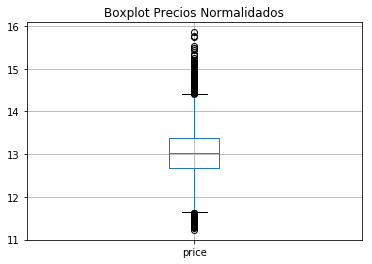

In [107]:
df.boxplot(column = ['price'], return_type = 'axes')
plt.title('Boxplot Precios Originales');
plt.show()
# Normalizamos la variable precio
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_scaled['price'] = np.log(df['price'])
df_scaled.boxplot(column = ['price'], return_type = 'axes')
plt.title('Boxplot Precios Normalidados')
plt.show()

#df_scaled.boxplot(column= [''], showfliers = False)
#plt.xticks(rotation=75)
#plt.show()

> La normalización de variables en un dataset se utiliza, por lo general, cuando necesitamos aplicar un proceso que requiere normalidad en la variable. Podemos observar los histogramas de la variable precio antes y despues de normalizarla:

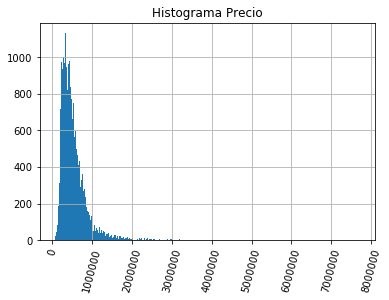

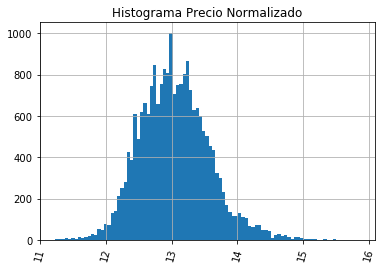

In [108]:
df.hist(column= ['price'], bins = 'fd', xrot = 75)
plt.title('Histograma Precio')
# Normalizamos la variable precio
df_scaled.hist(column=['price'], bins = 'fd', xrot = 75)
plt.title('Histograma Precio Normalizado')
plt.show()

> Por último, señalar que el término 'Normalizar' tiene connotaciones distintas dependiendo del problema, en ciertos contextos se le trata como una estandarización, el cual no modifica la distribución de la variable en cuestión, mientras que en otros si se modifica la distirbución para centrar al rededor de la media y acotar la varianza a 1, por lo general para aplicar procesos que requieren normalidad. En nuestro caso, lo que logramos es hacer que el coeficiente constante de la regresión ($a_0$) sea igual a la media de $y$ (correspondiente a la variable *precio*), al estar esta última centrada en su media producto de nuestra normalización y transformación, el intercepto de la regresión ($a_o$) será necesariamente igual a cero, en otras palabras, logramos hacer que el intercepto de la regresión esté en (0,0):
$$y = a_0 + x_i\cdot a$$
Puesto que la normalización no afecta la correlación de los coeficientes de la regresión, su utilidad solo está en la intepretación de los coeficientes obtenidos.

## (d) Regresión Lineal

In [109]:
import sklearn.linear_model as lm

X = df_scaled.iloc[:, 1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N)) #Se crea una columna nueva dentro de las variables predictoras llamada 'intecept'
y = df_scaled['price'] # asignamos como target la variable 'price'

'''
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara == 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
'''
# hay una forma mucho mas facil de hacer esto!, usando la misma libreria sklearn...
from sklearn.model_selection import train_test_split
#Separamos los subsets de test y train
Xtrain, Xtest, ytrain, ytest,  = train_test_split(X,y,test_size = 0.3, random_state = 65)



## (e) Z-Scores
Para calcular el Z-Score de los coeficientes, podemos utilizar la siguiente ecuación:
$$Z-Score(\beta_j) = \frac{\hat{\beta_j}}{\hat{\sigma}\sqrt{v_j}}$$
Donde:<br>
- $v_j$ es el j-ésimo elemento diagonal de la matríz $(X^TX)^{-1}$<br>
- $\hat{\sigma}$ es el estimador de la varianza


In [114]:
#Creamos el modelo, entrenamos y recuperamos los coeficientes de la regresion
#pd.set_option('display.float_format', lambda x: '%.4f'%x)
#pd.reset_option("display.float_format")

linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain,ytrain);
#print("Coeficientes: \n", linreg.coef_[:].tolist())
names = [i for i in list(df_scaled.iloc[:,1:])]
names.append('intercept')
coefficients = linreg.coef_

#Ahora debemos calcular el error estándar a partir de la ecuación (1)
from numpy.linalg import pinv
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm
model = sm.OLS(ytrain,Xtrain)
results = model.fit()
print(results.summary())


n = Xtrain.shape[1]
m = Xtrain.shape[0]

#mse = mean_squared_error(linreg.predict(Xtrain),ytrain)
MSE = np.sum((ytrain-linreg.predict(Xtrain).T)**2)/(m-n-1)
var_est = np.diag(np.linalg.pinv(np.dot(Xtrain.T,Xtrain)))
SE_est = np.sqrt(MSE*var_est)

#mse = mean_squared_error(ytrain,ypred)
#var_est = mse*np.diag(inv(np.dot(Xtrain.T,Xtrain)))
#SE_est = np.sqrt(var_est)

# Calculamos el error cuadratico medio a partir de la prediccion del modelo sobre los datos de train

#v_diag = np.diag(inv(np.dot(Xtrain.T,Xtrain)))

#SE_est = np.sqrt(mse*v_diag)
#Luego el error estandar será:
#std_error = np.sqrt(mse*v_diag)


#std_coef = Xtrain.std()
z_scores = (linreg.coef_/SE_est)

#Creamos un DataFrame con las variables pedidas
table = pd.DataFrame({'Atributo':Xtrain.columns.tolist(),'Coeficiente':coefficients,'Z-Score':z_scores,'Error Estandar':SE_est})
table = table[['Atributo','Coeficiente','Error Estandar','Z-Score']] #Reordenar las columnas para que se vea bien
table


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     3123.
Date:                Sun, 08 Oct 2017   Prob (F-statistic):               0.00
Time:                        19:47:03   Log-Likelihood:                -795.08
No. Observations:               15129   AIC:                             1624.
Df Residuals:                   15112   BIC:                             1754.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.0108      0.003     -4.137

,Atributo,Coeficiente,Error Estandar,Z-Score
0,bedrooms,-1.176308e-02,0.002621,-4.488171e+00
1,bathrooms,5.492932e-02,0.003816,1.439365e+01
2,sqft_living,1.158149e+12,0.002383,4.860010e+14
3,sqft_lot,1.632244e-02,0.003041,5.367799e+00
4,floors,3.910828e-02,0.002947,1.327021e+01
5,waterfront,3.359118e-02,0.002261,1.485809e+01
6,view,4.251228e-02,0.002473,1.719042e+01
7,condition,4.553883e-02,0.002291,1.987816e+01
8,grade,1.877292e-01,0.003821,4.912855e+01
9,sqft_above,-1.044218e+12,0.002556,-4.085905e+14


> Es interesante notar que muchos Z-Score son marcados como *NaN*, de hecho se obtiene un warning por esto. Podemos chequear la cantidad de coeficientes con esta sigularidad facilmente:

In [116]:
print(len([_ for _ in SE_est if np.isnan(_) ]))

0


> Podemos usar una aproximación por percentiles para calcular el umbral de aceptación de un atributo basandonos en su Z-Score, para un nivel de significancia de $\alpha = 0.05$, podemos filtrar todos aquellos Z-score menores o iguales a 2, los cuales se pueden considerar como de poco peso para el modelo. los atributos con los que nos quedamos luego del filtrado son:

In [134]:
tab = table[table['Z-Score'].abs()>=1.96]
print(tab)
print("Cantidad de atributos previos al filtrado: ", len(z_scores))
print("Cantidad de atributos finales después del filtrado: ", len(tab))

         Atributo   Coeficiente  Error Estandar       Z-Score
0        bedrooms -1.176308e-02        0.002621 -4.488171e+00
1       bathrooms  5.492932e-02        0.003816  1.439365e+01
2     sqft_living  1.158149e+12        0.002383  4.860010e+14
3        sqft_lot  1.632244e-02        0.003041  5.367799e+00
4          floors  3.910828e-02        0.002947  1.327021e+01
5      waterfront  3.359118e-02        0.002261  1.485809e+01
6            view  4.251228e-02        0.002473  1.719042e+01
7       condition  4.553883e-02        0.002291  1.987816e+01
8           grade  1.877292e-01        0.003821  4.912855e+01
9      sqft_above -1.044218e+12        0.002556 -4.085905e+14
10  sqft_basement -5.580848e+11        0.002351 -2.373562e+14
11       yr_built -9.387207e-02        0.003210 -2.923936e+01
12   yr_renovated  1.539612e-02        0.002205  6.983306e+00
13            lat  1.871948e-01        0.002196  8.522554e+01
14           long -5.905151e-03        0.002543 -2.321706e+00
15  sqft

> Obtenemos una reducción de 9 dimensiones de atributos para el modelo. <br>
> Quizás sea interesante analizar un poco el modelo de regresión ahora que tenemos los coeficientes más trabajados y seleccionados:<br>
> - Primero, es interesantante notar que hay ciertos atributos con coeficiente de regresión negativos, lo que implica que como predictores actuan disminuyendo el valor pedicho para la variable objetivo 'precio', si observamos los atributos con esta propiedad, veremos que los pies cuadrados construidos sobre la casa (*'sqft_above'*), los pies cuadrados del sótano (*'sqt_basement'*) y el año de construcción (*'yr_built'*) actuan disminuyendo el precio de la vivienda, en algunas de estas variables parece ser un poco más intuitiva esta respuesta(como por ejemplo los pies cuadrados construidos de sotano, puede darse una tendencia a que las personas precindan de esta propiedad), sin embargo, llama la atención que el año de contrucción de la vivienda actúe con coeficiente negativo, uno tendería a pensar que las casas mas nuevas y modernas son mas caras y mejor equipadas que las antiguas.

> - Dentro de los atributos que más impacto tienen en el precio, destacan el número de baños de la vivienda y la cantidad de pies cuadrados hábiles para vivienda (de las viviendas medidas el 2015).

## (f) Correción del método

> Ya que asumimos que el error de los coeficientes estimados se comporta de la siguiente forma: $\epsilon \sim N(\beta, \sigma^2)$, la distribución del error es simétrica con respecto al valor esperado \beta (coeficiente paramétrico de la regresión), además, con esto en cuenta, el Z-Score es de interés solo en su magnitud, nos interesa saber la significancia estadística del atributo en desviaciones estándar, por lo que tener un error estandar de -1.0 por ejemplo, nos es equivalente estadísticamente a tener un error estándar de 1.0. Luego, sin perder generalidad, podemos trabajar el error estandar del coeficiente en terminos de su valor absoluto.<br>
> Con la modificación, obtenemos entonces los siguientes resultados para el error estándar y los Z-Scores:<br>

In [120]:
# El nuevo error estandar será:
std_error_corrected = np.sqrt(mse*abs(var_est))

#std_coef = Xtrain.std()
z_scores_corrected = (linreg.coef_.round(4)/std_error_corrected).round(4)

#Creamos un DataFrame con las variables pedidas
table_post_correct = pd.DataFrame({'Atributo':Xtrain.columns.tolist(),'Coeficiente':coefficients,'Z-Score':z_scores_corrected,'Error Estandar':std_error_corrected})
table_post_correct = table_post_correct[['Atributo','Coeficiente','Error Estandar','Z-Score']] #Reordenar las columnas para que se vea bien
table_post_correct


,Atributo,Coeficiente,Error Estandar,Z-Score
0,bedrooms,-1.176308e-02,0.002619,-4.505100e+00
1,bathrooms,5.492932e-02,0.003814,1.439500e+01
2,sqft_living,1.158149e+12,0.002382,4.863064e+14
3,sqft_lot,1.632244e-02,0.003039,5.363800e+00
4,floors,3.910828e-02,0.002945,1.327570e+01
5,waterfront,3.359118e-02,0.002259,1.487130e+01
6,view,4.251228e-02,0.002471,1.719630e+01
7,condition,4.553883e-02,0.002289,1.987370e+01
8,grade,1.877292e-01,0.003819,4.915180e+01
9,sqft_above,-1.044218e+12,0.002554,-4.088473e+14


> Luego del Filtrado:

In [133]:
tab_correct = table_post_correct[table_post_correct['Z-Score'].abs() >=1.96]
print("Cantidad de atributos previos al filtrado: ", len(z_scores_corrected))
print("Cantidad de atributos finales después del filtrado: ", len(tab_correct))
tab_correct

Cantidad de atributos previos al filtrado:  18
Cantidad de atributos finales después del filtrado:  17


,Atributo,Coeficiente,Error Estandar,Z-Score
0,bedrooms,-1.176308e-02,0.002619,-4.505100e+00
1,bathrooms,5.492932e-02,0.003814,1.439500e+01
2,sqft_living,1.158149e+12,0.002382,4.863064e+14
3,sqft_lot,1.632244e-02,0.003039,5.363800e+00
4,floors,3.910828e-02,0.002945,1.327570e+01
5,waterfront,3.359118e-02,0.002259,1.487130e+01
6,view,4.251228e-02,0.002471,1.719630e+01
7,condition,4.553883e-02,0.002289,1.987370e+01
8,grade,1.877292e-01,0.003819,4.915180e+01
9,sqft_above,-1.044218e+12,0.002554,-4.088473e+14


## (g) Estimación del Error de Predicción
> Usaremos Cross-Validation para estimar el error de predicción de nuestro modelo, con $K = 5$ y $K = 10$ *folds*.

In [160]:
yhat_test = linreg.predict(Xtest)
# Aqui en vez de usar el codigo provisto, utilice la funcion imporporada ya en sklearn
mse_test = mean_squared_error(ytrain,linreg.predict(Xtrain))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()

from sklearn.model_selection import KFold
kf_10 = KFold(n_splits = 10)
kf_5 = KFold(n_splits = 5)
mse_cv = 0

# Para K = 10
coef_v10 = []
for train, val in kf_10.split(Xm):
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm[train],ym[train])
    coef_v10.append(linreg.coef_)
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val-ym[val], 2))
    mse_cv +=mse_fold
coef_v10T = pd.DataFrame([[fold[x] for x in range(len(Xtrain.columns.tolist()))] for fold in coef_v10])

coef_v10T.columns = Xtrain.columns.tolist()
print("Coeficientes en cada Fold: K = 10 \n",coef_v10T)
print()
    
# Para K = 5
coef_v5 = []
for train, val in kf_5.split(Xm):
    linreg = lm.LinearRegression(fit_intercept=False)
    linreg.fit(Xm[train],ym[train])
    coef_v5.append(linreg.coef_)
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val-ym[val], 2))
    mse_cv +=mse_fold
coef_v5T = pd.DataFrame([[fold[x] for x in range(len(Xtrain.columns.tolist()))] for fold in coef_v5])

coef_v5T.columns = Xtrain.columns.tolist()
print("Coeficientes en cada fold: K = 5 \n",coef_v5T)



'''
Xm.columns.tolist()
table_coef_5 = pd.DataFrame({'Atributo':Xm.columns.tolist(),'Coeficiente':coef_v5,'Z-Score':z_scores_corrected,'Error Estandar':std_error_corrected})
table_post_correct = table_post_correct[['Atributo','Coeficiente','Error Estandar','Z-Score']] #Reordenar las columnas para que se vea bien
'''

mse_cv_10 = mse_cv/10
mse_cv_5 = mse_cv/5
print("Mean Squared Error K = 10:", mse_cv_10.round(4))
print("Mean Squared Error K = 5:", mse_cv_5.round(4))
print("Accuracy:", linreg.score(Xtest,ytest).round(4))

Coeficientes en cada Fold: K = 10 
    bedrooms  bathrooms   sqft_living  sqft_lot    floors  waterfront  \
0 -0.011901   0.054234 -1.076388e+12  0.017865  0.040120    0.032890   
1 -0.011931   0.055296 -7.598416e+11  0.016012  0.039904    0.033394   
2 -0.010075   0.050980  6.541526e-02  0.015591  0.040368    0.032258   
3 -0.011133   0.049338  6.882322e-02  0.015939  0.039950    0.033208   
4 -0.011435   0.054009  6.468055e-02  0.020902  0.039517    0.032096   
5 -0.009687   0.057099  4.949292e+11  0.015471  0.038157    0.034728   
6 -0.009977   0.056712  1.713700e+12  0.016835  0.038911    0.035447   
7 -0.012032   0.053496  2.468595e+11  0.015571  0.038435    0.033630   
8 -0.012594   0.054004  6.642854e-02  0.017313  0.039288    0.032883   
9 -0.011121   0.052880  8.190389e+10  0.017065  0.038779    0.033232   

       view  condition     grade    sqft_above  sqft_basement  yr_built  \
0  0.042121   0.043120  0.187152  9.705007e+11   5.186862e+11 -0.094421   
1  0.041107   0.04333

## (h) Distribución del Error en la Predicción

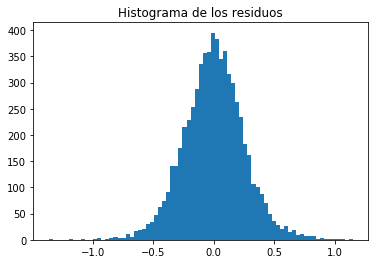

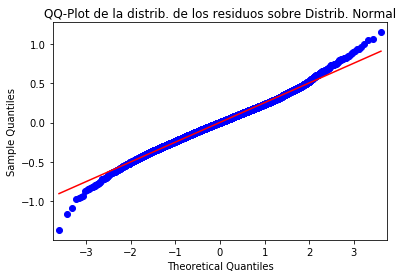

In [161]:
price_pred = linreg.predict(Xtest)
len(ytest)
len(price_pred)
residuals = ytest-price_pred
plt.hist(residuals, bins='fd')
plt.title("Histograma de los residuos")

sm.qqplot(residuals, line = 's')
plt.title("QQ-Plot de la distrib. de los residuos sobre Distrib. Normal")
plt.show()

> La distribución de los residuos es bastante simétrica y ciertamente asemeja a una normal, notar tambien que parece estar centrada en el valor 0.0, como es de esperarse luego de la normalización y escalamiento realizado, y correspondientose con la asumción de error gausiano. De la gráfica del qq-plot se observa que los cuartiles se corresponden bastante bien entre una distribuciín normal estandar y la distribución de los residuos exceptuando una leve diferencia de cuartiles en los extremos de la gráfica, que indican que la distribución de residuos tiene colas levemente más pesadas que la distribución normal teórica.<br>
> Finalmente, es razonable, de acuerdo al histograma, a la gráfica cuartil cuartil de la distribución de residuos y al fundamento teórico que respalda el fenómeno, asumir una distribución aproximadamente normal para los residuos de la regresión.

# 2) Selección de Atributos

## a) Forwars Step-wise Selection (FSS)

In [96]:
# Codigo entregado en Tarea
def fss(x,y, names_x, k = 10000):
    p = x.shape[1]-1 #No tomamos el intercepto dentro de las variables
    k = min(p,k) # Cantidad de iteraciones es la menor entre la cantidad de variables y un valor fijo
    names_x = np.array(names_x) #Recuperamos los nombres de las variables
    remaining = list(range(0,p))
    selected = [p] #partimos una lista vacia de largo p
    current_score = best_new_score = 0.0 #score inicial = 0
    while remaining and len(selected) <= k:
        score_candidates = []
        print("remaining", remaining)
        for candidate in remaining:
            print("candidate", candidate)
            model = lm.LinearRegression(fit_intercept = False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            print(pd.DataFrame(x_train))
            
            predictions_train = model.fit(x_train, y).predict(x_train) #predice con las variables seleccionadas
            residuals_train = predictions_train-y #Calculo de los residuos
            mse_candidate = np.mean(np.power(residuals_train,2)) #Calculo del MSE de los residuos
            score_candidates.append((mse_candidate,candidate)) #guarda los scores de los candidatos actuales
        score_candidates.sort() #Reordena los scores de menor a mayor
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s ..." % (names_x[best_candidate]))
        print("totalvars = %d, mse = %f" % (len(indexes),best_new_score))
    return selected
names_regressors = X.columns[:-1] #sin intercepto
fss(Xm,ym,names_regressors)

remaining [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
candidate 0
         0         1
0      1.0 -0.398737
1      1.0 -0.398737
2      1.0 -0.398737
3      1.0  0.676485
4      1.0 -0.398737
5      1.0 -0.398737
6      1.0 -0.398737
7      1.0 -0.398737
8      1.0  0.676485
9      1.0  0.676485
10     1.0  0.676485
11     1.0 -0.398737
12     1.0 -2.549182
13     1.0 -1.473959
14     1.0  0.676485
15     1.0 -0.398737
16     1.0  1.751707
17     1.0 -0.398737
18     1.0 -0.398737
19     1.0 -1.473959
20     1.0 -0.398737
21     1.0  0.676485
22     1.0  0.676485
23     1.0  0.676485
24     1.0  0.676485
25     1.0 -0.398737
26     1.0 -0.398737
27     1.0  0.676485
28     1.0  0.676485
29     1.0  0.676485
...    ...       ...
15099  1.0 -1.473959
15100  1.0 -0.398737
15101  1.0 -0.398737
15102  1.0 -0.398737
15103  1.0  1.751707
15104  1.0 -0.398737
15105  1.0 -0.398737
15106  1.0  0.676485
15107  1.0 -0.398737
15108  1.0 -1.473959
15109  1.0 -0.398737
15110  1.0 -0.39

         0         1         2
0      1.0 -0.558836 -0.398737
1      1.0  1.993418 -0.398737
2      1.0  0.291916 -0.398737
3      1.0 -0.558836  0.676485
4      1.0  0.291916 -0.398737
5      1.0 -1.409587 -0.398737
6      1.0  0.291916 -0.398737
7      1.0  1.142667 -0.398737
8      1.0  1.993418  0.676485
9      1.0  0.291916  0.676485
10     1.0 -0.558836  0.676485
11     1.0 -0.558836 -0.398737
12     1.0  0.291916 -2.549182
13     1.0 -1.409587 -1.473959
14     1.0  0.291916  0.676485
15     1.0  0.291916 -0.398737
16     1.0 -0.558836  1.751707
17     1.0  0.291916 -0.398737
18     1.0 -0.558836 -0.398737
19     1.0 -0.558836 -1.473959
20     1.0  0.291916 -0.398737
21     1.0  0.291916  0.676485
22     1.0 -0.558836  0.676485
23     1.0 -1.409587  0.676485
24     1.0  1.993418  0.676485
25     1.0  0.291916 -0.398737
26     1.0 -0.558836 -0.398737
27     1.0  1.142667  0.676485
28     1.0 -0.558836  0.676485
29     1.0  1.142667  0.676485
...    ...       ...       ...
15099  1

         0         1          2
0      1.0 -0.558836  -0.328472
1      1.0  1.993418  -0.185304
2      1.0  0.291916  -0.331768
3      1.0 -0.558836  -0.222076
4      1.0  0.291916  -0.152524
5      1.0 -1.409587  -0.138021
6      1.0  0.291916  -0.240572
7      1.0  1.142667  -0.186366
8      1.0  1.993418   0.895032
9      1.0  0.291916  -0.103593
10     1.0 -0.558836  -0.086745
11     1.0 -0.558836  -0.426481
12     1.0  0.291916  -0.397181
13     1.0 -1.409587  -0.336823
14     1.0  0.291916  -0.138826
15     1.0  0.291916  -0.106450
16     1.0 -0.558836   0.174723
17     1.0  0.291916  -0.176404
18     1.0 -0.558836  -0.167321
19     1.0 -0.558836  -0.269872
20     1.0  0.291916  -0.198819
21     1.0  0.291916   0.005550
22     1.0 -0.558836  -0.190212
23     1.0 -1.409587  -0.188124
24     1.0  1.993418   2.563606
25     1.0  0.291916  -0.206144
26     1.0 -0.558836  -0.315653
27     1.0  1.142667  -0.109380
28     1.0 -0.558836  -0.218120
29     1.0  1.142667  -0.290089
...    .

         0         1         2         3
0      1.0 -0.558836  0.770403 -0.826631
1      1.0  1.993418  0.530797  1.814257
2      1.0  0.291916  1.266937  0.530290
3      1.0 -0.558836 -0.475984 -0.038742
4      1.0  0.291916  0.100660  0.559471
5      1.0 -1.409587 -1.687729 -1.205985
6      1.0  0.291916  0.537292  1.712124
7      1.0  1.142667  1.136309  0.734557
8      1.0  1.993418  1.326839  2.091478
9      1.0  0.291916 -0.766831  0.501109
10     1.0 -0.558836  1.256112 -0.038742
11     1.0 -0.558836  0.848348 -0.914174
12     1.0  0.291916 -0.092036 -0.315962
13     1.0 -1.409587 -0.203179 -0.272190
14     1.0  0.291916  0.003229  0.282250
15     1.0  0.291916  0.473060 -0.403505
16     1.0 -0.558836  0.166335  0.895053
17     1.0  0.291916 -0.993447 -0.491048
18     1.0 -0.558836  1.260442 -0.826631
19     1.0 -0.558836  0.989080 -1.366481
20     1.0  0.291916  1.168785 -0.520229
21     1.0  0.291916 -0.914781  0.005030
22     1.0 -0.558836  1.157960 -0.461867
23     1.0 -1.40

         0         1         2         3         4
0      1.0 -0.558836  0.770403 -0.533416 -0.722631
1      1.0  1.993418  0.530797  1.916444  2.477574
2      1.0  0.291916  1.266937  0.196098  0.569527
3      1.0 -0.558836 -0.475984 -0.130550  0.207240
4      1.0  0.291916  0.100660 -0.065220  0.279697
5      1.0 -1.409587 -1.687729 -0.958058 -0.710555
6      1.0  0.291916  0.537292  1.165154  0.412536
7      1.0  1.142667  1.136309  0.500970  0.907662
8      1.0  1.993418  1.326839  0.914724  1.366559
9      1.0  0.291916 -0.766831  0.718735 -0.142972
10     1.0 -0.558836  1.256112  0.239651 -0.722631
11     1.0 -0.558836  0.848348 -0.778402 -0.571678
12     1.0  0.291916 -0.092036 -1.371813 -1.241910
13     1.0 -1.409587 -0.203179 -0.511639 -0.215429
14     1.0  0.291916  0.003229 -0.021667 -0.420725
15     1.0  0.291916  0.473060 -1.077829 -0.843394
16     1.0 -0.558836  0.166335  0.664294 -0.444878
17     1.0  0.291916 -0.993447 -0.489863 -0.565640
18     1.0 -0.558836  1.260442 

         0         1         2         3         4         5
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.473621
1      1.0  1.993418  0.530797  1.916444  0.987135  2.772519
2      1.0  0.291916  1.266937  0.196098  0.782864  0.500221
3      1.0 -0.558836 -0.475984 -0.130550  1.055226  0.500221
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.473621
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -1.447464
6      1.0  0.291916  0.537292  1.165154 -1.566253  0.824835
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.500221
8      1.0  1.993418  1.326839  0.914724  0.816910  0.500221
9      1.0  0.291916 -0.766831  0.718735  0.306232  1.149449
10     1.0 -0.558836  1.256112  0.239651 -0.340627  0.500221
11     1.0 -0.558836  0.848348 -0.778402  1.089271  0.500221
12     1.0  0.291916 -0.092036 -1.371813  1.225452 -1.447464
13     1.0 -1.409587 -0.203179 -0.511639 -0.783214 -0.473621
14     1.0  0.291916  0.003229 -0.021667  0.408367  0.175607
15     1.0  0.291916  0.

         0         1         2         3         4         5
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.826631
1      1.0  1.993418  0.530797  1.916444  0.987135  1.814257
2      1.0  0.291916  1.266937  0.196098  0.782864  0.530290
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.038742
4      1.0  0.291916  0.100660 -0.065220 -0.510853  0.559471
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -1.205985
6      1.0  0.291916  0.537292  1.165154 -1.566253  1.712124
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.734557
8      1.0  1.993418  1.326839  0.914724  0.816910  2.091478
9      1.0  0.291916 -0.766831  0.718735  0.306232  0.501109
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.038742
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.914174
12     1.0  0.291916 -0.092036 -1.371813  1.225452 -0.315962
13     1.0 -1.409587 -0.203179 -0.511639 -0.783214 -0.272190
14     1.0  0.291916  0.003229 -0.021667  0.408367  0.282250
15     1.0  0.291916  0.

         0         1         2         3         4         5         6
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759  0.245141
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759 -0.658681
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759 -0.658681
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759 -0.658681
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.658681
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -0.658681
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  1.646066
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213 -0.658681
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759 -0.658681
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.759044
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  1.849426
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759 -0.545703
12     1.0  0.291916 -0.092036 -1.371813  1.225452 -0.305759 -0.523108
13    

         0         1         2         3         4         5          6
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759  -0.328472
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  -0.185304
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  -0.331768
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  -0.222076
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759  -0.152524
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759  -0.138021
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  -0.240572
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  -0.186366
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759   0.895032
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  -0.103593
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  -0.086745
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  -0.426481
12     1.0  0.291916 -0.092036 -1.371813  1.225452 -0.305759  -0

         0         1         2         3         4         5         6  \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

         0         1         2         3         4         5         6  \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

[15129 rows x 10 columns]
candidate 3
         0         1         2         3         4         5         6  \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   


         0         1         2         3         4         5         6  \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

        0         1         2         3         4         5         6   \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

        0         1         2         3         4         5         6   \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

        0         1         2         3         4         5         6   \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

selected = sqft_lot ...
totalvars = 13, mse = 0.065186
remaining [0, 9, 10, 14, 16]
candidate 0
        0         1         2         3         4         5         6   \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.55

        0         1         2         3         4         5         6   \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

candidate 10
        0         1         2         3         4         5         6   \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.0

        0         1         2         3         4         5         6   \
0      1.0 -0.558836  0.770403 -0.533416 -2.145021 -0.305759 -0.473621   
1      1.0  1.993418  0.530797  1.916444  0.987135 -0.305759  2.772519   
2      1.0  0.291916  1.266937  0.196098  0.782864 -0.305759  0.500221   
3      1.0 -0.558836 -0.475984 -0.130550  1.055226 -0.305759  0.500221   
4      1.0  0.291916  0.100660 -0.065220 -0.510853 -0.305759 -0.473621   
5      1.0 -1.409587 -1.687729 -0.958058 -0.340627 -0.305759 -1.447464   
6      1.0  0.291916  0.537292  1.165154 -1.566253 -0.305759  0.824835   
7      1.0  1.142667  1.136309  0.500970 -1.055576  0.999213  0.500221   
8      1.0  1.993418  1.326839  0.914724  0.816910 -0.305759  0.500221   
9      1.0  0.291916 -0.766831  0.718735  0.306232 -0.305759  1.149449   
10     1.0 -0.558836  1.256112  0.239651 -0.340627 -0.305759  0.500221   
11     1.0 -0.558836  0.848348 -0.778402  1.089271 -0.305759  0.500221   
12     1.0  0.291916 -0.092036 -1.3718

[17, 8, 13, 2, 11, 6, 1, 15, 7, 5, 4, 12, 3, 0, 14, 9, 16, 10]